In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, IPython.display as ipd, matplotlib.pyplot as plt
import librosa, librosa.display

In [193]:
dong = []
deng = []
dang = []
x, sr = librosa.load('audio/reong_15.wav')
ipd.Audio(x, rate=sr)

In [194]:
hop_length = 100
onset_env = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length)

In [195]:
onset_samples = librosa.onset.onset_detect(x,
                                           sr=sr, units='samples', 
                                           hop_length=hop_length, 
                                           backtrack=False,
                                           pre_max=20,
                                           post_max=20,
                                           pre_avg=100,
                                           post_avg=100,
                                           delta=0.2,
                                           wait=0)

In [196]:
onset_boundaries = numpy.concatenate([[0], onset_samples, [len(x)]])

In [197]:
onset_times = librosa.samples_to_time(onset_boundaries, sr=sr)

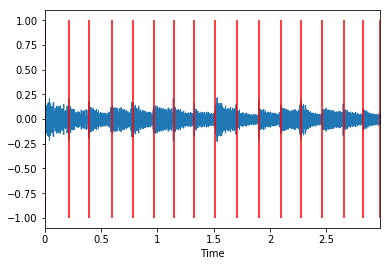

In [198]:
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, -1, 1, color='r')

In [199]:
def estimate_pitch(segment, sr, fmin=50.0, fmax=2000.0):
    
    # Compute autocorrelation of input segment.
    r = librosa.autocorrelate(segment)
    
    # Define lower and upper limits for the autocorrelation argmax.
    i_min = sr/fmax
    i_max = sr/fmin
    r[:int(i_min)] = 0
    r[int(i_max):] = 0
    
    # Find the location of the maximum autocorrelation.
    i = r.argmax()
    f0 = float(sr)/i
    print(f0)
    return f0

In [200]:
def generate_sine(f0, sr, n_duration):
    n = numpy.arange(n_duration)
    return 0.2*numpy.sin(2*numpy.pi*f0*n/float(sr))

In [201]:
def estimate_pitch_and_generate_sine(x, onset_samples, i, sr):
    n0 = onset_samples[i]
    n1 = onset_samples[i+1]
    f0 = estimate_pitch(x[n0:n1], sr)
    
    t0 = onset_times[i]

    
    if f0 >= 59 and f0 <= 64:
        dong.append(t0)
    elif f0 >= 147 and f0<= 148:
        deng.append(t0)
    elif f0 >= 296 and f0<= 330:
        dang.append(t0)
    return generate_sine(f0, sr, n1-n0)
    

In [202]:
y = numpy.concatenate([
    estimate_pitch_and_generate_sine(x, onset_boundaries, i, sr=sr)
    for i in range(len(onset_boundaries)-1)
])

67.02127659574468
63.18051575931232
63.72832369942196
297.97297297297297
63.36206896551724
59.11528150134048
63.72832369942196
63.0
297.97297297297297
711.2903225806451
63.72832369942196
297.97297297297297
329.1044776119403
59.11528150134048
612.5
711.2903225806451


In [203]:
print('dang',dang)
print('dong',dong)
print('deng',deng)

dang [0.5941043083900227, 1.5147392290249433, 2.0952380952380953, 2.2766439909297054]
dong [0.21768707482993196, 0.3945578231292517, 0.780045351473923, 0.9659863945578231, 1.1428571428571428, 1.3287981859410432, 1.9002267573696145, 2.4580498866213154]
deng []


In [204]:
clicks = librosa.clicks(times=dong, sr=sr, length=len(x))
ipd.Audio(x+clicks, rate=sr)